In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

def majority_threshold(n):
  if n%2 == 0:
    return n/2
  else:
    return (n+1)/2

# Simulation (2b)

In [3]:
p = 0.3 # prob of doctors or students
n = 1 # num of doctors or students

def get_probability(number_of_jury, p):
  prob_maj = 0
  majority = majority_threshold(number_of_jury)
  for c in range(number_of_jury+1):
    prob = nCr(number_of_jury, c) * (pow(p, c) * pow((1 - p), (number_of_jury-c)))
    if c >= majority: # only sum when you reach the majority number of voters 
      prob_maj += prob
    #print('probability of majority', c, ':' , prob_maj, 'prob', prob)
  return prob_maj

print('Final probability value of majority:', get_probability(n, p))

Final probability value of majority: 0.3


# Plotting (2c)

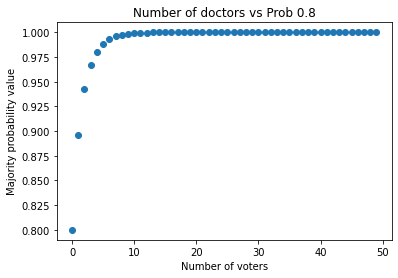

In [6]:
prob = []
p = 0.8
number_of_jury = 100
for i in range(1, number_of_jury+1, 2):
  #if i%2 == 0:
  prob.append(get_probability(i, p))
plt.scatter(range(50),prob)
plt.title('Number of doctors vs Prob 0.8')
plt.xlabel('Number of voters')
plt.ylabel('Majority probability value')
plt.show()

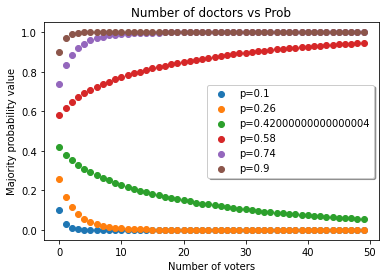

In [23]:
for p in np.linspace(0.1, 0.9, 6):
  prob = []
  number_of_jury = 100
  for i in range(1, number_of_jury+1, 2):
    prob.append(get_probability(i, p))
  
  plt.scatter(range(50),prob, label=f'p={p}')
  plt.title('Number of doctors vs Prob')
  plt.xlabel('Number of voters')
  plt.ylabel('Majority probability value')

plt.legend(shadow=True)
plt.show()

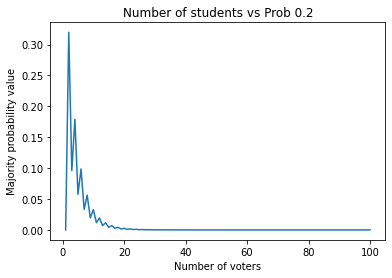

In [ ]:
prob_array, numVoters_array = prob_majority(0, 1, 0.2, 100)
plt.plot(numVoters_array, prob_array)
plt.title('Number of students vs Prob 0.2')
plt.xlabel('Number of voters')
plt.ylabel('Majority probability value')
plt.show()

# Plotting (3a)

In [5]:
def classifier(p=0.8):
    return np.random.binomial(1, p, 1)[0]

In [6]:
def simulate(w_strong, w_weak, iter):
    simulations = []
    for _ in range(iter):
        predictions = []
        for _ in range(10):
            predictions.append(classifier(0.6)*w_weak)
        predictions.append(classifier(0.8)*w_strong)
        simulations.append(sum(predictions)>5)

    return sum(simulations)/iter

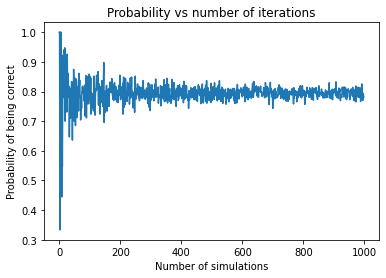

In [20]:
prob_simulated = []
for i in range(1,1000):
    prob_simulated.append(simulate(1, 1, i))

plt.plot(prob_simulated)
plt.title('Probability vs number of iterations')
plt.xlabel('Number of simulations')
plt.ylabel('Probability of being correct')
plt.show()

In [7]:
ps = []
weights = np.linspace(0, 11, 100)
for w in weights:
    weak = (11 - w) / 10
    ps.append( simulate(w, weak, 1000) )

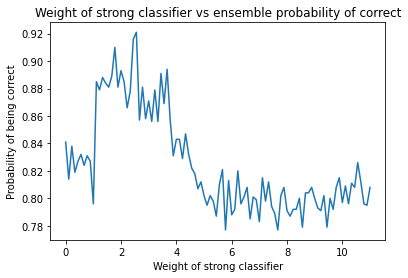

In [8]:
plt.plot(weights, ps)
plt.title('Weight of strong classifier vs ensemble probability of correct')
plt.xlabel('Weight of strong classifier')
plt.ylabel('Probability of being correct')
plt.show()

In [21]:
print(f'Best weight of strong classifier: {weights[np.argmax(ps)]}')
print(f'Best weight of weak classifiers: {(11 - weights[np.argmax(ps)]) / 10}')
print(f'Best probability: {max(ps)}')



Best weight of strong classifier: 2.5555555555555554
Best weight of weak classifiers: 0.8444444444444444
Best probability: 0.921
